In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns


In [18]:
traffic_data = pd.read_excel("Data-Traffic.xlsx")
clusters_data = pd.read_csv("Final clusters.csv")
KMeans_classification = clusters_data[['BS Name', 'KMeans']]
KMeans_classification.rename(columns={'BS Name': 'site'}, inplace=True)
merged_data = traffic_data.merge(KMeans_classification, on='site', how='left')

merged_data.to_excel("merged_traffic_data.xlsx", index=False)

merged_traffic_data = pd.read_excel("merged_traffic_data.xlsx")
merged_traffic_data['KMeans'] = merged_traffic_data['KMeans'].replace('Business/Industrial', 'Commercial')




/tmp/ipykernel_8491/4063070562.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KMeans_classification.rename(columns={'BS Name': 'site'}, inplace=True)


Data successfully merged and saved!
Category names updated successfully!


In [19]:
merged_traffic_data.head()

,site,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,KMeans
0,A001,94.74,82.00,66.06,45.93,33.63,34.35,34.86,47.07,66.11,...,88.35,90.59,89.60,86.74,89.27,93.80,96.98,102.55,98.26,Residential
1,A002,42.50,28.61,18.84,11.92,9.63,8.60,12.40,35.17,57.36,...,67.13,77.83,80.89,73.70,64.08,58.77,71.91,64.69,55.23,Mixed
2,A004,21.28,26.63,14.67,9.99,4.90,5.12,5.59,8.52,15.21,...,20.41,17.53,26.06,28.13,31.97,30.12,31.01,37.33,33.31,Residential
3,A005,73.77,61.79,44.45,45.26,31.08,34.43,30.58,42.26,56.88,...,69.61,73.11,91.47,90.71,100.15,96.00,95.71,87.17,85.33,Residential
4,A006,10.72,8.94,6.06,4.25,3.32,2.46,2.97,6.26,12.20,...,36.43,44.05,52.38,33.70,23.42,17.78,11.83,13.04,14.79,Commercial


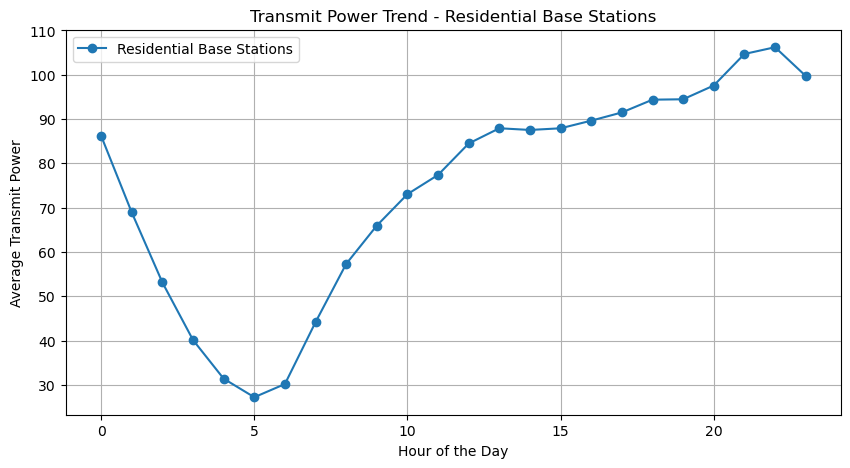

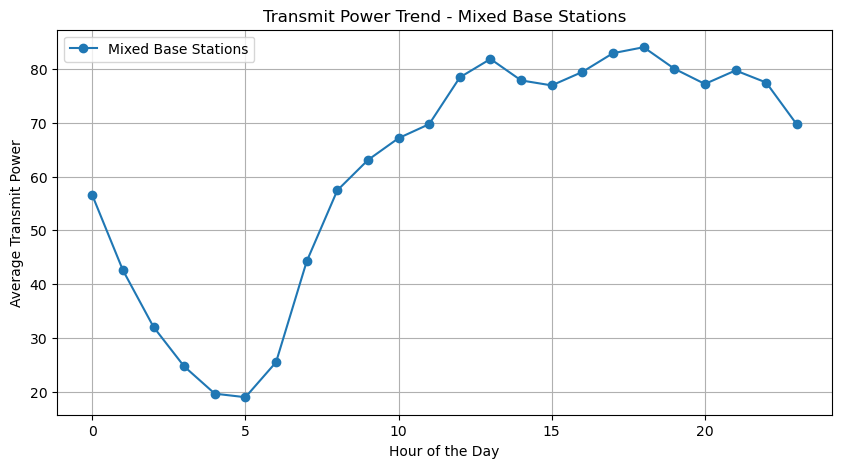

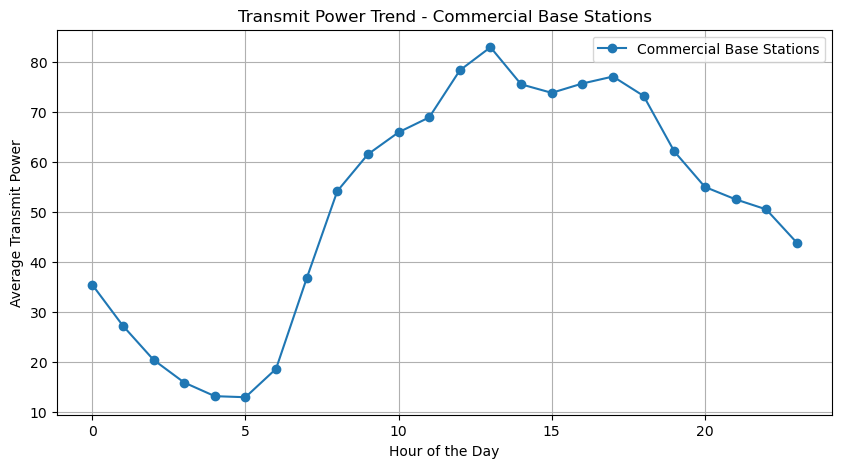

In [46]:
# TEMPORAL PATTERN ANALYSIS
data = merged_traffic_data

# Group base stations by classification type 
residential = data[data['KMeans'] == 'Residential']
mixed = data[data['KMeans'] == 'Mixed']
commercial = data[data['KMeans'] == 'Commercial']

# plot time-series data
def plot_power_trends(df, title):
    avg_power = df.iloc[:, 1:25].mean()  # Columns 0-23 represent hourly power
    plt.figure(figsize=(10, 5))
    plt.plot(avg_power.index, avg_power.values, marker='o', linestyle='-', label=title)
    plt.xlabel("Hour of the Day")
    plt.ylabel("Average Transmit Power")
    plt.title(f"Transmit Power Trend - {title}")
    plt.legend()
    plt.grid(True)
    plt.show()

# plot for each category
plot_power_trends(residential, "Residential Base Stations")
plot_power_trends(mixed, "Mixed Base Stations")
plot_power_trends(commercial, "Commercial Base Stations")

# Statistical analysis
stats = pd.DataFrame(columns=['Category', 'Peak Hour', 'Off-Peak Hour', 'Max Power', 'Min Power', 'Std Dev', 'Power Ratio'])

for category, df in zip(['Residential', 'Mixed', 'Commercial'], [residential, mixed, commercial]):
    avg_power = df.iloc[:, 1:25].mean()
    peak_hour = avg_power.idxmax()
    off_peak_hour = avg_power.idxmin()
    max_power = avg_power.max()
    min_power = avg_power.min()
    std_dev = avg_power.std()
    power_ratio = max_power / min_power if min_power != 0 else None

    stats.loc[len(stats)] = [category, peak_hour, off_peak_hour, max_power, min_power, std_dev, power_ratio]

#print(stats)


Extended Statistical Analysis:
      Category  Peak Hour  Off-Peak Hour   Max Power  Min Power  Median Power  \
0  Residential         22              5  106.208392  27.230427     85.348204   
1        Mixed         18              5   84.050267  18.951467     69.715689   
2   Commercial         13              5   82.952583  12.870750     54.562917   

     Std Dev        IQR  Power Ratio  
0  24.831263  35.946910     3.900357  
1  22.487005  34.896733     4.435027  
2  23.465019  40.005396     6.445047  


/tmp/ipykernel_8491/1278515509.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Anomaly"] = anomalies



Category: Residential
Detected 4 anomalies in 398 base stations.


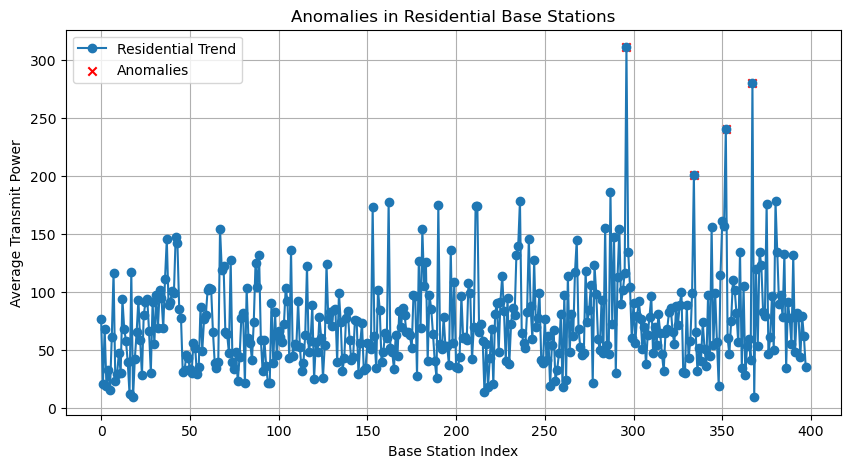

/tmp/ipykernel_8491/1278515509.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Anomaly"] = anomalies



Category: Mixed
Detected 3 anomalies in 225 base stations.


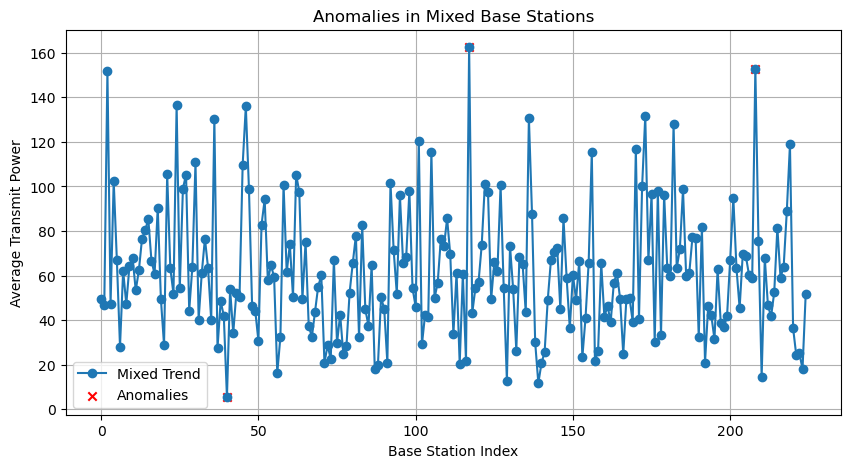

/tmp/ipykernel_8491/1278515509.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Anomaly"] = anomalies



Category: Commercial
Detected 2 anomalies in 120 base stations.


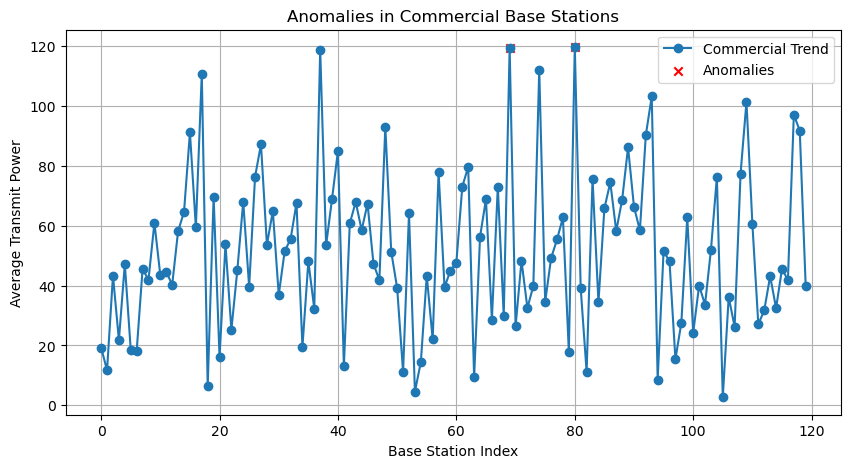


Telecom Characteristics by Base Station Type:
   Category  Median Power   Std Dev  Power Ratio
Residential     85.348204 24.831263     3.900357
      Mixed     69.715689 22.487005     4.435027
 Commercial     54.562917 23.465019     6.445047

Telecom Profile for Residential:
- Strong peak hour usage pattern, likely evening-focused (19:00-23:00)
- High power profile, likely a macro cell serving a dense area.

Telecom Profile for Mixed:
- Balanced peak/off-peak behavior, moderate traffic across the day.

Telecom Profile for Commercial:
- Sharp midday peak usage (9:00-17:00), with deep nighttime reductions.


In [47]:
categories = ['Residential', 'Mixed', 'Commercial']
grouped_data = {category: data[data['KMeans'] == category] for category in categories}

# Statistical Analysis
stats = pd.DataFrame(columns=['Category', 'Peak Hour', 'Off-Peak Hour', 'Max Power', 'Min Power',
                              'Median Power', 'Std Dev', 'IQR', 'Power Ratio'])

for category, df in grouped_data.items():
    avg_power = df.iloc[:, 1:25].mean()  # Extract hourly data
    peak_hour = avg_power.idxmax()
    off_peak_hour = avg_power.idxmin()
    max_power = avg_power.max()
    min_power = avg_power.min()
    median_power = avg_power.median()
    std_dev = avg_power.std()
    iqr = np.percentile(avg_power, 75) - np.percentile(avg_power, 25)  # Interquartile Range
    power_ratio = max_power / min_power if min_power != 0 else None
    
    stats.loc[len(stats)] = [category, peak_hour, off_peak_hour, max_power, min_power, 
                             median_power, std_dev, iqr, power_ratio]

print("Extended Statistical Analysis:")
print(stats)

# Apply Isolation Forest for anomaly detection
for category, df in grouped_data.items():
    hourly_data = df.iloc[:, 1:25]  # Extract hourly power usage
    model = IsolationForest(contamination=0.01, random_state=42)  # 5% contamination level
    anomalies = model.fit_predict(hourly_data)

    # Store anomaly flags correctly
    df.loc[:, "Anomaly"] = anomalies
    
    anomaly_count = np.sum(anomalies == -1)
    print(f"\nCategory: {category}")
    print(f"Detected {anomaly_count} anomalies in {len(df)} base stations.")

    # Plot anomalies correctly at the **base station level**
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(df)), hourly_data.mean(axis=1), marker='o', linestyle='-', label=f"{category} Trend")
    plt.scatter(np.where(anomalies == -1)[0], hourly_data.mean(axis=1)[anomalies == -1], 
                color='red', label="Anomalies", marker="x")
    
    plt.xlabel("Base Station Index")
    plt.ylabel("Average Transmit Power")
    plt.title(f"Anomalies in {category} Base Stations")
    plt.legend()
    plt.grid(True)
    plt.show()
def telecom_interpretation(stats_df):
    """Provide telecom-specific insights based on power profiles."""
    
    print("\nTelecom Characteristics by Base Station Type:")
    print(stats_df[['Category', 'Median Power', 'Std Dev', 'Power Ratio']].to_string(index=False))
    
    # Generate interpretation for individual base stations
    for idx, row in stats_df.iterrows():
        category = row['Category']
        
        print(f"\nTelecom Profile for {category}:")
        
        # **Peak-to-Off-Peak Ratio Interpretation**
        if category == "Residential":
            if row['Power Ratio'] > 3:
                print("- Strong peak hour usage pattern, likely evening-focused (19:00-23:00)")
            else:
                print("- Steady power usage throughout the day, less variation than expected.")
        
        elif category == "Mixed":
            if row['Power Ratio'] > 2:
                print("- Balanced peak/off-peak behavior, moderate traffic across the day.")
            else:
                print("- Unusual low variation, possibly a misclassified area.")

        elif category == "Commercial":
            if row['Power Ratio'] > 4:
                print("- Sharp midday peak usage (9:00-17:00), with deep nighttime reductions.")
            else:
                print("- Commercial area but showing inconsistent peak/off-peak behavior.")

        # **Variability Analysis**
        if row['Std Dev'] > 25:
            print("- High fluctuation, suggesting unstable demand or unexpected traffic spikes.")
        elif row['Std Dev'] < 15:
            print("- Consistent power usage without extreme changes.")

        # **Power Level Interpretation**
        if row['Median Power'] > 80:
            print("- High power profile, likely a macro cell serving a dense area.")
        elif row['Median Power'] < 50:
            print("- Lower power profile, possibly small cells or business-specific infrastructure.")
telecom_interpretation(stats)

#Matches expected behavior: 
#residents are active in the evenings.
#Mixed Shows combined residential and business activity, with a balanced curve.
#Businesses operate during midday, dropping power usage at night.

#power levels: 
#likely due to evening spikes from home usage.
#mixed Balances between residential and commercial needs.
#Businesses operate consistently but don’t show large spikes.

#power variability: SD: Measures overall fluctuations in power.
#residential have the highest varibility as expected

#Interquartile range:  Reflects how spread out the middle 50% of power values are.
#commercial: Suggests strong variations in daily business operations.
#residential and mixed: More stable usage.

#Power ratio: Higher power ratio suggests greater contrast between peak and off-peak hours.
#commercial: Big difference between daytime business activity and nighttime shutdown.
#mixed:  Less contrast, maintaining power usage across time.
#residential: More gradual shifts, balancing activity between morning and evening.


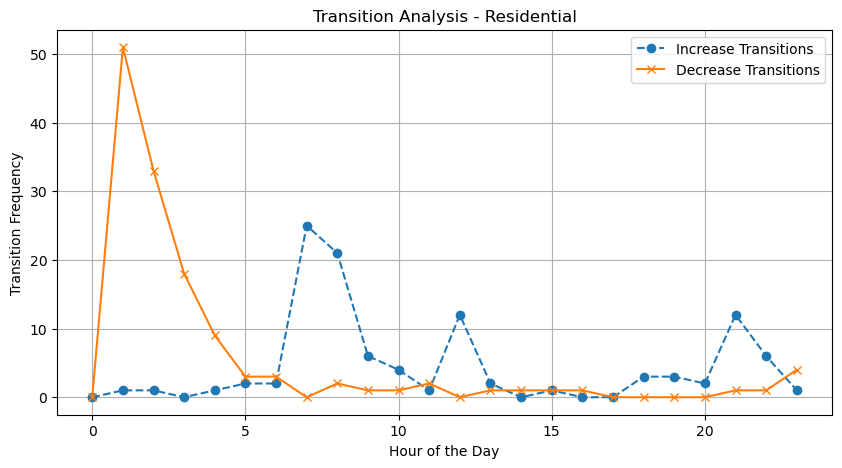

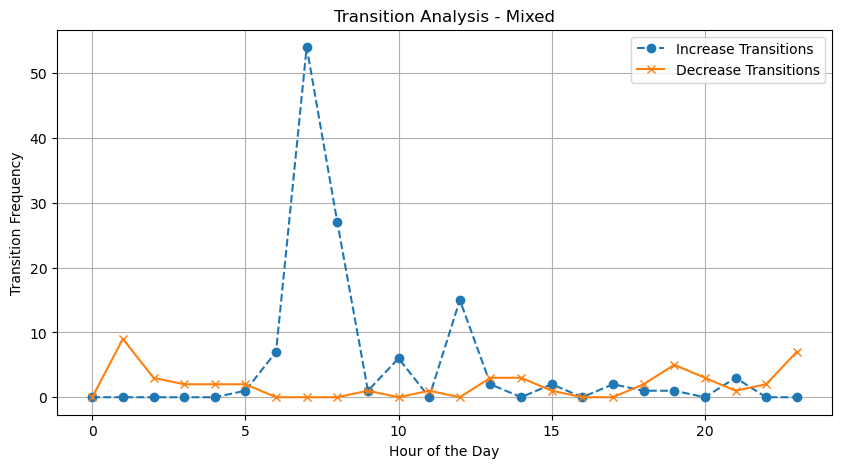

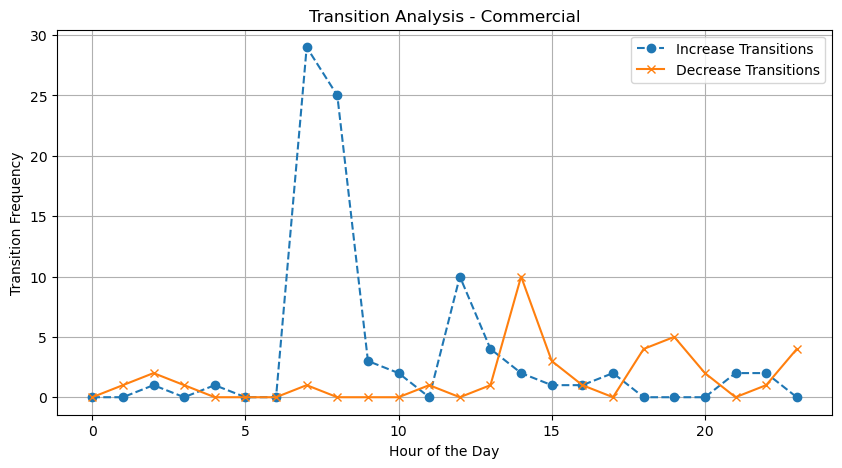

In [25]:
#detect transitions
def detect_transitions(df, category):
    transition_data = {}

    for index, row in df.iterrows():
        power_levels = row[1:25].values  # Extract hourly power levels
        transitions = []

        for hour in range(1, len(power_levels)):  
            change = power_levels[hour] - power_levels[hour - 1]
            if abs(change) > np.std(power_levels):  # Consider significant power shifts
                transitions.append((hour, power_levels[hour], "Increase" if change > 0 else "Decrease"))

        transition_data[row["site"]] = transitions

    # Aggregate transition patterns
    avg_transitions = {}
    for site, events in transition_data.items():
        for hour, power, direction in events:
            avg_transitions.setdefault(hour, []).append((power, direction))

    # Visualize transition frequency
    plt.figure(figsize=(10, 5))
    increase_counts = [sum(1 for p, d in avg_transitions.get(h, []) if d == "Increase") for h in range(24)]
    decrease_counts = [sum(1 for p, d in avg_transitions.get(h, []) if d == "Decrease") for h in range(24)]

    plt.plot(range(24), increase_counts, label="Increase Transitions", linestyle="--", marker="o")
    plt.plot(range(24), decrease_counts, label="Decrease Transitions", linestyle="-", marker="x")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Transition Frequency")
    plt.title(f"Transition Analysis - {category}")
    plt.legend()
    plt.grid(True)
    plt.show()

    return transition_data

# Apply transition analysis to each category
for category in ['Residential', 'Mixed', 'Commercial']:
    detect_transitions(data[data['KMeans'] == category], category)


In [42]:
hour_cols = [col for col in data.columns if isinstance(col, int)]  

for col in hour_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')  

# Apply traffic estimation formula
for col in hour_cols:
    data[f"Estimated Traffic {col}"] = 1.713 * data[col] + 1.274  

# Compute average estimated traffic per category
traffic_cols = [f"Estimated Traffic {col}" for col in hour_cols]
traffic_stats = data.groupby("KMeans")[traffic_cols].mean()

print("Estimated Traffic Load Per Base Station Type:")
print(traffic_stats)


Estimated Traffic Load Per Base Station Type:
             Estimated Traffic 0  Estimated Traffic 1  Estimated Traffic 2  \
KMeans                                                                       
Commercial             61.914771            47.838765            36.145827   
Mixed                  98.136613            74.217347            56.131417   
Residential           148.952419           119.335940            92.273768   

             Estimated Traffic 3  Estimated Traffic 4  Estimated Traffic 5  \
KMeans                                                                       
Commercial             28.367379            23.684180            23.321595   
Mixed                  43.558377            34.870574            33.737862   
Residential            70.029344            55.088584            47.919722   

             Estimated Traffic 6  Estimated Traffic 7  Estimated Traffic 8  \
KMeans                                                                       
Commercial      

/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


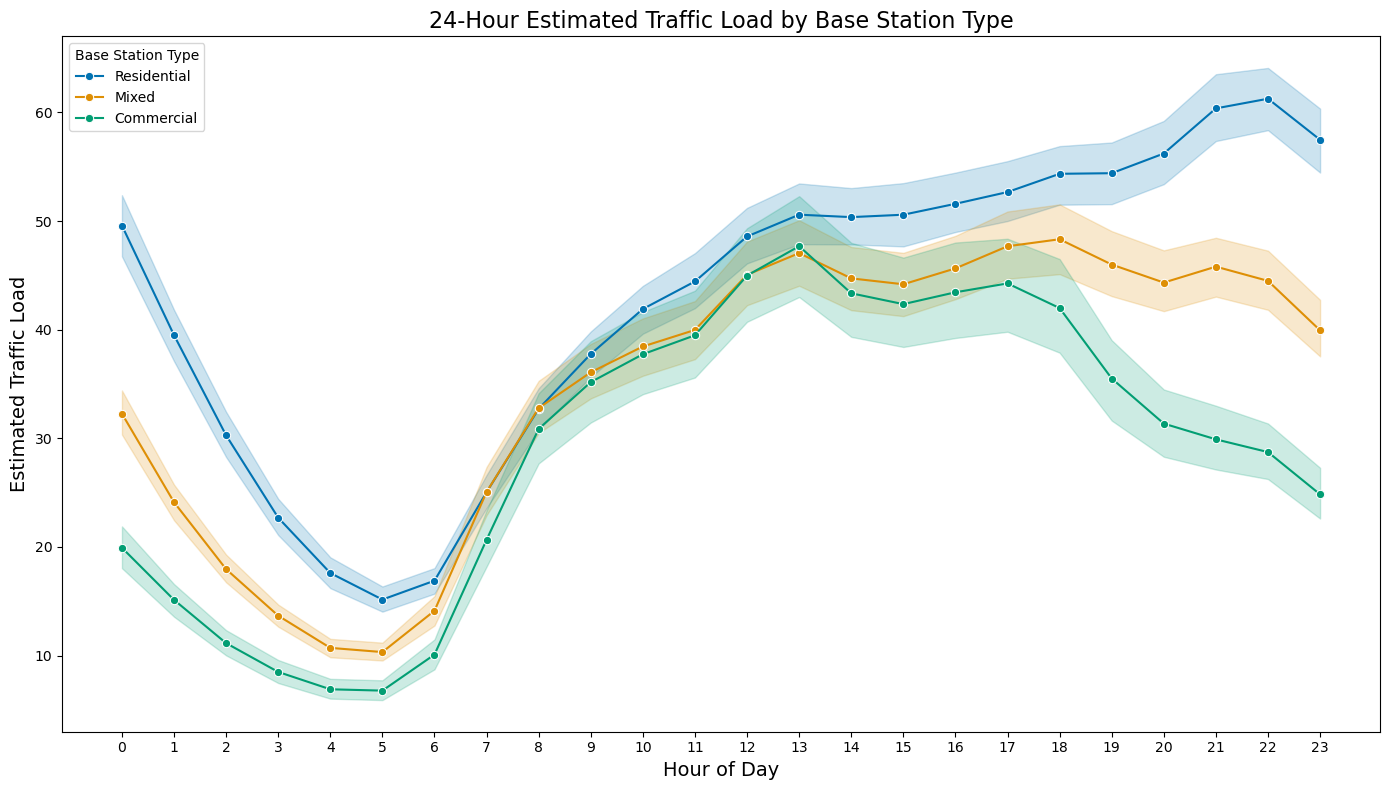

In [43]:
def estimate_traffic(df):
    hour_cols = [col for col in df.columns if isinstance(col, int)]
    traffic_df = pd.DataFrame()
    traffic_df['site'] = df['site'] 
    traffic_df['KMeans'] = df['KMeans']
    for col in hour_cols:
        traffic_df[f"Traffic_{col}"] = (df[col] - 1.274) / 1.713  # Apply formula
    
    # Convert data for plotting
    traffic_cols = [f"Traffic_{col}" for col in hour_cols]
    plot_data = pd.melt(traffic_df, id_vars=['site', 'KMeans'], 
                         value_vars=traffic_cols,
                         var_name='Hour', value_name='Estimated Traffic')

    plot_data['Hour'] = plot_data['Hour'].apply(lambda x: int(x.replace('Traffic_', '')))
    plot_data = plot_data.sort_values(['site', 'Hour'])

    plt.figure(figsize=(14, 8))
    sns.lineplot(data=plot_data, x='Hour', y='Estimated Traffic', hue='KMeans', palette='colorblind', marker='o')
    
    plt.title('24-Hour Estimated Traffic Load by Base Station Type', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=14)
    plt.ylabel('Estimated Traffic Load', fontsize=14)
    plt.xticks(range(0, 24))
    plt.legend(title='Base Station Type')
    plt.tight_layout()
    plt.savefig('estimated_traffic.png', dpi=300)
    plt.show()
    
    return traffic_df

traffic_results = estimate_traffic(data)



In [ ]:
#Residential base stations
#typically show distinctive "twin peak" patterns, with higher
#transmit power during morning and evening hours. The ratio between peak and off-peak hours 
#is generally high, reflecting the absence of users during working hours. 

#possible reccomendations
#Dynamic power allocation during peak hours
#Potential power-saving modes during consistent off-peak periods
#Load balancing with neighboring cells during evening peak usage